In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import seaborn as sns
from tqdm import tqdm

In [3]:
%matplotlib inline

### method A (Using Eratosthenes)

In [4]:
def method_A(N):
    a = set(range(2,N+1))
    n = N**0.5
    c = 0
    while True:
        i = list(a)[c]
        if i > n:
            break
        if i in a:
            a -= set(range(i*2,N+1,i))
            c += 1
    return len(a)

### method B (paper's new method)

In [5]:
def method_B(N):
    A = set()
    B = set(range(3,N+1,2))
    for i in range(3,N+1,2):
        t = i
        while i * t <= N:
            A.add(i*t)
            t += 2
    a = (B - A)
    a.add(2)
    return len(a)

### method C (our advanced method)

In [6]:
def method_C(N):
    A = set()
    B = set(range(5,N+1,6)) | set(range(7,N+1,6))
    for i in range(5,N+1,6):
        t = i
        while i * t <= N:
            A.add(i*t)
            t += 6
        t = i + 2
        while i * t <= N:
            A.add(i*t)
            t += 6
    for i in range(7,N+1,6):
        t = i - 2
        while i * t <= N:
            A.add(i*t)
            t += 6
        t = i
        while i * t <= N:
            A.add(i*t)
            t += 6
    a = (B - A)
    a.update((2,3))
    return len(a)

In [7]:
lst = [200000 * i for i in range(1,21)]
t1 = []
t2 = []
t3 = []

In [8]:
for N in tqdm(lst):
    t1.append(sum(timeit.repeat(stmt = "method_A(N)", setup = 'from __main__ import method_A; N =' + str(N), number = 1, repeat = 10))/10)
    t2.append(sum(timeit.repeat(stmt = "method_B(N)", setup = 'from __main__ import method_B; N =' + str(N), number = 1, repeat = 10))/10)
    t3.append(sum(timeit.repeat(stmt = "method_C(N)", setup = 'from __main__ import method_C; N =' + str(N), number = 1, repeat = 10))/10)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:40<00:00, 11.03s/it]


In [9]:
df = pd.DataFrame(columns = ["N","methodA", "methodB", "methodC"])

In [10]:
for i in range(20):
    df.loc[i] = [lst[i], t1[i], t2[i], t3[i]]

In [12]:
df[["N","methodB", "methodC"]]

,N,methodB,methodC
0,200000.0,0.093274,0.053009
1,400000.0,0.231254,0.108027
2,600000.0,0.352237,0.179955
3,800000.0,0.605034,0.268536
4,1000000.0,0.635905,0.387634
5,1200000.0,0.760796,0.414940
6,1400000.0,0.916776,0.503571
7,1600000.0,1.198118,0.598749
8,1800000.0,1.330172,0.709671
9,2000000.0,1.408308,0.790070


In [20]:
x = df["N"]
y2 = df["methodB"]
y3 = df["methodC"]

In [21]:
list(range(1,21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

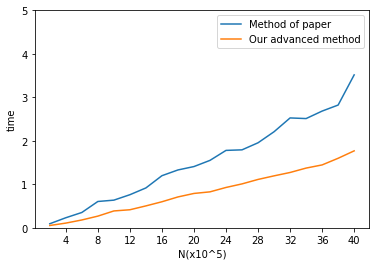

In [22]:
plt.ylim(0,5)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xticks([400000 * i for i in range(1,11)], labels = ['4','8','12','16','20','24','28','32','36','40'])
plt.xlabel("N(x10^5)")
plt.ylabel("time")
plt.legend(["Method of paper", "Our advanced method"])
plt.show()